# Validation

In this notebook we validate our formulation of the utility.

In [1]:
import itertools
import numpy as np
import axelrod as axl

from fractions import Fraction

In [2]:
import opt_mo

In [3]:
import matplotlib.pyplot as plt
import matplotlib 

In [4]:
font = {'size'   : 15,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [50]:
def play_match(player, opponent, repetitions=500):
    total = 0 
    players = [axl.MemoryOnePlayer(i) for i in [player, opponent]]
    for rep in range(repetitions):
        match = axl.Match(players=players, turns=500)
        _ = match.play()
        
        total += match.final_score_per_turn()[0]
        
    return total / repetitions

In [51]:
ps = itertools.product(*[np.linspace(0, 1, num=4)  for _ in range(4)])

In [52]:
qs = [(1/3, 1/3 , 1/3, i) for i in np.linspace(0, 1, 20)]

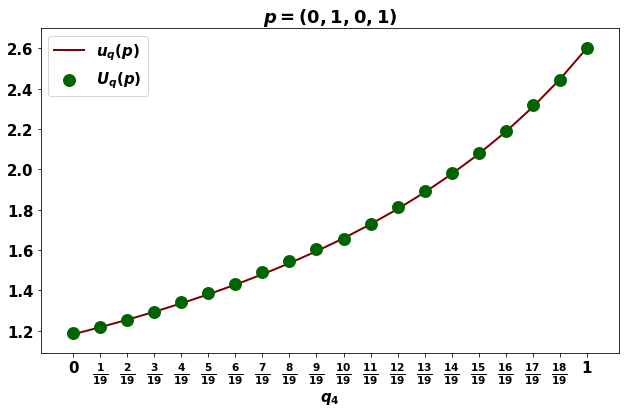

In [53]:
count = 0
for p in [[0, 1, 0, 1]]: #ps:
    
    theoritical = [opt_mo.utility(p, q) for q in qs]
    simulated = [play_match(p, q) for q in qs]
    
    # labels
    xlabels = [str(Fraction(i).limit_denominator()) for i in np.linspace(0, 1, 20)]
    xlabels[1:-1] = [r'$\frac{' + i.split('/')[0] + '}{' + i.split('/')[1] + '}$' for i in xlabels[1:-1]]
    # title
    title = str([str(Fraction(i).limit_denominator()) for i in p])
    title = title.replace('[','(').replace(']', ')').replace("'", '')
    
    plt.figure(figsize=(9, 6))
    plt.plot(range(len(theoritical)), theoritical, linestyle='-', color='maroon', linewidth=2,
             zorder=1, label='$u_q(p)$')
    plt.scatter(range(len(simulated)), simulated, marker='o', s=120, color='darkgreen', zorder=2,
               label='$U_q(p)$', linewidth='2')
    plt.title(r'$p={}$'.format(title))
    plt.legend()

    plt.xticks(range(len(theoritical)), xlabels, rotation=0, fontsize=15)
    plt.xlabel(r'$q_4$')

    plt.tight_layout()
    plt.savefig('../img/validation_img_three.png');# .format(count));
    count += 1